# Un exemple d'utilisation d'hdf5 en python

### Notebook

Plusieurs environnements sont disponibles (menu kernel ci-dessus -->change kernel). On travaillera ici avec Python3.

Chaque "cellule" peut contenir soit du code python, soit du "texte" (Markdown ou Code dans le menu en haut).

Vous pouvez exécuter les cellules une à une (voir commandes ci-après) ou exécuter toute la page (menu Kernel->Restart & Run all).

Attention: chaque cellule peut-être exécutée indépendamment des autres mais les résultats d'exécution sont conservées.
Pour repartir de zero il faut soit faire appel à "%reset" ou à restart dans le menu kernel

### Notebook - Principales commandes
Editer une cellule : Enter

Exécuter une cellule : Shift + Enter

Supprimer une cellule : DD

Ajouter une cellule: Ctrl-m b

Liste des raccourcis : Ctrl-m h

Liste des "magic commands" ipython : %lsmagic

Plus d'infos : https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html#references

## Import du package hdf5

Pour utiliser hdf5 en python, nous aurons besoin du package h5py.

Nous aurons également besoin de numpy qui est le package standard de calcul scientifique en python, http://www.numpy.org.

Nous l'utiliserons pour manipuler des matrices et des vecteurs.

In [1]:
import h5py
import numpy as np

Pour obtenir des infos sur un package ou une fonction, il suffit d'utiliser
"?", et la doc apparait en bas du navigateur.

In [2]:
?h5py

L'objectif de cette démo/TP est d'illustrer les concepts de base d'hdf5, à travers la création d'un exemple simple.
Nous allons sauvegarder dans un fichier hdf5 des champs scalaires représentant certaines grandeurs physiques sur une grille 3D (sous forme de tableau numpy), puis les visualiser, les relire etc.

## Definition des variables

Pour commencer, on crée un tableau 3D de dimension Nx X Ny X Nz, rempli aléatoirement, grâce à numpy (np).

In [3]:
# Resolution du champ
Nx = Ny = Nz = 256
resolution = (Nx, Ny, Nz)

# Deux champs scalaires, initialisés aléatoirement
vx = np.random.random_sample(resolution)
temperature = np.random.random_sample(resolution)

Dans numpy, l'accès aux valeurs du tableau se fait comme suit 

(pour plus de détails voir un des nombreux tuto disponibles en ligne, par exemple,
https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)

In [4]:
# un exemple de manipulation de tableau ...
small_tab = np.random.random((4,6))
# un élement:
print(small_tab[3, 3])
# une "ligne"
print(small_tab[2, :])
# une sous-partie du tableau:   
print(small_tab[2:4, 2:4])

0.742534497954
[ 0.93521814  0.44043806  0.16654934  0.33576459  0.25932649  0.25146865]
[[ 0.16654934  0.33576459]
 [ 0.77168381  0.7425345 ]]


## 1 - Le "fichier" hdf5

Le "fichier" hdf5 est l'objet principal qui permettra de stocker vos données et leurs attributs. On parlera à la fois
de "fichier" pour le fichier sur le disque (extension .h5, .hdf5 ou .he5) et pour l'objet manipulé dans le code.

Il s'agit d'une sorte de container de **datasets** (les structures de données, voir plus bas) qui peut également être organisé en **groupes** et sous-groupes. 

**TP** - *Créez un "fichier" hdf5 nommé hdf_file, en mode 'écriture'. Il faudra pour cela faire appel à la fonction
h5py.File*

Rappel : pour accèder à la doc, il suffit de taper
?h5py.NOM_FONCTION.

In [5]:
# Affichage de la documentation de la fonction
?h5py.File

In [5]:
filename = 'demo_v0.h5'
# Création/ouverture en mode 'ecriture'
mode = 'w'
hdf_file = ...

Quand toutes les données auront été sauvegardées, il sera nécessaire de fermer le fichier, pour
valider l'écriture sur le disque, via la fonction close().

*Vérifiez que le fichier a bien été créé. Notez au passage que dans ipython notebook vous avez accès à certaines commandes du terminal*

In [7]:
ls -altr

total 240
-rw-r--r--   1 Franck  staff   1337  9 jan 14:51 main_parallel.py
drwxr-xr-x  12 Franck  staff    408  9 jan 14:51 hysop/
-rw-r--r--   1 Franck  staff    602  9 jan 14:51 demo_io.py
-rw-r--r--   1 Franck  staff    819  9 jan 14:51 demo_io.cxx
-rw-r--r--   1 Franck  staff   2869  9 jan 14:51 demo_hdf5.py
-rw-r--r--   1 Franck  staff    380  9 jan 14:51 README
-rw-r--r--   1 Franck  staff   4404  1 fév 14:42 xdmf.py
drwxr-xr-x  33 Franck  staff   1122  3 fév 10:49 ../
drwxr-xr-x   3 Franck  staff    102  3 fév 11:26 __pycache__/
-rw-r--r--   1 Franck  staff   1124  3 fév 11:37 demo_ok.xmf
-rw-r--r--   1 Franck  staff  58532  3 fév 11:38 demo_hdf5.ipynb
drwxr-xr-x   5 Franck  staff    170  3 fév 11:39 .ipynb_checkpoints/
-rw-r--r--   1 Franck  staff  27170  3 fév 11:43 demo_hdf5_correction.ipynb
drwxr-xr-x  15 Franck  staff    510  3 fév 11:44 ./
-rw-r--r--   1 Franck  staff      0  3 fév 11:44 demo_v0.h5


Dans la mesure ou h5py.File est une classe, on peut avoir accès à ses attributs et méthodes.

Dans le notebook il suffit d'utiliser la complétion pour avoir une liste complète des attributs:

nom_class. + TAB

*Affichage du nom du fichier sur le disque et le nom de l'objet file:*

In [8]:
print(hdf_file.name)
print(hdf_file.filename)

/
demo_v0.h5


## Création de datasets: des tableaux dans le fichiers hdf5

Dans un fichier hdf, les "données" sont stockées sous forme de dataset.
Un dataset est un tableau multi-dimensionnel contenant des données d'un même type.

**TP** *Créez deux datasets dans le fichier hdf5, pour stocker les deux champs scalaires définis plus haut:*

* *un dataset 'data_velo' vide et de même résolution que vx*
* *un dataset 'data_tp' qui contient une copie de temperature*



In [9]:
# Création de dataset : 
?h5py.File.create_dataset

In [6]:
# Paramètres : nom, shape, type
data_velo = ...
# Paramètres : un tableau numpy
data_tp = ...

## Manipulation des datasets

Les datasets peuvent être manipulés comme des tableaux numpy:

In [7]:
print(data_tp)
print(data_velo)
print(data_tp.shape)
# A ce stade, data_tp contient les mêmes valeurs que temperature tandis que tous les éléments de data_velo sont nuls.
print(np.allclose(data_tp, temperature))
print(temperature[1,5,3])
print(data_velo[1:10, 1,3])

Ellipsis
Ellipsis


AttributeError: 'ellipsis' object has no attribute 'shape'

ou par l'intermédiaire du fichier hdf5, via leur nom:

In [12]:
print(hdf_file['velocity'])

<HDF5 dataset "velocity": shape (256, 256, 256), type "<f8">


La modification du contenu de chaque dataset est similaire à celle d'un tableau numpy.
Nous allons maintenant remplir data_velo en calculant le cosinus de vx:

In [13]:
data_velo[...] = np.cos(vx)



## Les groupes

Il est donc possible de l'organiser en groupes et sous-groupes contenant des datasets, via la fonction
create_group.

**TP ** *Créez un groupe 'champs' et un groupe 'infos' contenant un sous-groupe  'diverses'.*

Remarque: l'objet fichier hdf5 possède a une structure arborescente, à la manière d'un système de fichier classique.
Nous avons vu plus haut que le nom de l'objet hdf_file est '/'. Cela se traduit également dans la manière de nommer les groupes. le groupe 'diverses' apparaitra ainsi:

/infos/diverses.


In [14]:
?h5py.File.create_group

In [15]:
# Creation d'un groupe 'champs'
g1 = ...
# Puis d'un groupe infos/diverses


<HDF5 group "/infos/diverses" (0 members)>

L'accès aux données et attributs se fait de manière classique:

In [16]:
print(hdf_file['champs'])
print(hdf_file['infos'])

<HDF5 group "/champs" (0 members)>
<HDF5 group "/infos" (1 members)>


Nous sommes maintenant en mesure de créer un dataset 'density' dans le groupe champs, représenant un champ
scalaire de la même resolution que temperature

In [8]:
...

Ellipsis

On peut balayer tous les éléments du groupe

In [18]:
for it in hdf_file.items():
    print(it)
for it in hdf_file['champs'].items():
    print("groupe champs ...")
    print(it)

('champs', <HDF5 group "/champs" (1 members)>)
('infos', <HDF5 group "/infos" (1 members)>)
('temperature', <HDF5 dataset "temperature": shape (256, 256, 256), type "<f8">)
('velocity', <HDF5 dataset "velocity": shape (256, 256, 256), type "<f8">)
groupe champs ...
('density', <HDF5 dataset "density": shape (256, 256, 256), type "<f8">)


Ou également supprimer un groupe avec la fonction python del

In [19]:
del hdf_file['/infos/diverses']

In [20]:
print(g1['density'])

<HDF5 dataset "density": shape (256, 256, 256), type "<f8">


## Attributs

Un autre intérêt du format hdf5 est de pouvoir associer aux datasets et groupes des méta-données, i.e. des informations sous formes d'attributs.

Voici quelques exemples:

In [21]:
hdf_file['velocity'].attrs['année'] = 2015
hdf_file['velocity'].attrs['commentaires'] = 'Valeurs experimentales du champs de vitesse'
g1['density'].attrs['description'] = u"une description du champs"

Puis afficher les caractéristiques d'un dataset:

In [22]:
for it in hdf_file['velocity'].attrs.values():
    print(it)

2015
Valeurs experimentales du champs de vitesse


## Ecriture et fermeture du fichier :

Nous sommes maintenant en mesure de fermer le fichier.

La visualisation des données peut se faire par différentes méthodes:

* h5dump
* hdfview
* un logiciel capable de lire du hdf5 (visit ...)


**TD** *Visualisez le contenu du fichier avec hdfview et hdfdump, dans votre terminal*

In [23]:
hdf_file.close()

Nous allons maintenant repartir de zero et charger des données d'un fichier hdf5

## Lecture d'un fichier hdf5

**TP** *Créez un tableau 'new_field' à partir du champs temperature du fichier hdf5 'demo_v0.h5'*

* ouvrir le fichier demo_v0.h5
* créer le tableau numpy à partir du dataset temperature

Notes : 
* la lecture se fait simplement en créant un objet fichier en mode 'lecture'
* il faudra utiliser la fonction np.asarray pour assurer la conversion du dataset vers le tableau numpy
 
 tab_numpy = np.asarray(dataset)


In [24]:
# Remise à zero de l'environnement ...
#%reset
import h5py
import numpy as np

In [25]:
# Lecture du fichier hdf5
filename = 'demo_v0.h5'
in_file = h5py.File(filename, 'r')

Affichage du contenu du fichier ...

Notez au passage l'intérêt du format hdf5 : le fichier est 'auto-suffisant': toutes les informations
nécessaires à la comprehension de son contenu sont disponibles (noms des variables, dimensions des tableaux ...)

In [26]:
# On balaies tout le contenu du fichier (datasets et groupes)
for keys in in_file:
    print(keys, in_file[keys])
    # Dans chaque cas, on affiche la liste des attributs
    for it in in_file[keys].attrs.items():
        print('-->', it)

champs <HDF5 group "/champs" (1 members)>
infos <HDF5 group "/infos" (0 members)>
temperature <HDF5 dataset "temperature": shape (256, 256, 256), type "<f8">
velocity <HDF5 dataset "velocity": shape (256, 256, 256), type "<f8">
--> ('année', 2015)
--> ('commentaires', 'Valeurs experimentales du champs de vitesse')


In [27]:
# Création d'un nouveau tableau
new_field = np.asarray(in_file['velocity'])
print(new_field[1:10, 1:10, 3])
print(new_field.shape)
print(new_field.dtype)

[[ 0.99951884  0.8821975   0.98073101  0.61121372  0.97585271  0.97829434
   0.81172044  0.99972648  0.75650334]
 [ 0.99901897  0.96697666  0.55531918  0.8851684   0.97042763  0.97155086
   0.91525546  0.70261767  0.61530351]
 [ 0.54825728  0.88011354  0.99727672  0.93720997  0.96912112  0.96632235
   0.9999719   0.99989241  0.88178572]
 [ 0.9995329   0.99560357  0.99947794  0.99652537  0.89623101  0.98052064
   0.90926823  0.54302826  0.96554664]
 [ 0.95647653  0.83498855  0.97786865  0.89755076  0.96377316  0.82734979
   0.70397695  0.9258419   0.99024897]
 [ 0.95346867  0.92837166  0.98417524  0.888097    0.98449198  0.8702273
   0.64231014  0.56812021  0.85563666]
 [ 0.94167169  0.96702219  0.59190949  0.89599489  0.8138452   0.82463327
   0.99633212  0.81138381  0.77861555]
 [ 0.91904358  0.99937667  0.89721755  0.63918954  0.59633188  0.95312374
   0.74835974  0.69995203  0.91510943]
 [ 0.97363139  0.77423368  0.62398188  0.57166697  0.99220713  0.99897877
   0.6772553   0.577017

In [28]:
# Ne pas oublier de fermer le fichier!
in_file.close()

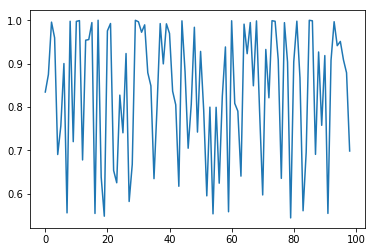

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(new_field[1:100, 1, 1])

# Un exemple d'utilisation de XDMF et HDF5

Paraview n'est (malheureusement) pas capable de lire directement du hdf5.
Il faut le convertir en xmf. Nous vous proposons ici un exemple avec une fonction python capable de
faire cette conversion.


In [30]:
# On recupère la fonction permettant d'écrire l'entête xdmf
from xdmf import XDMFWriter

##### Cette fonction est un exemple de génération de la partie 'ASCII' du fichier xdmf, en fonction de la  géométrie du domaine et de la grille.

In [31]:
help(XDMFWriter)

Help on class XDMFWriter in module xdmf:

class XDMFWriter(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, h5filename, dimension, resolution, origin, space_step, dataset_names, ite, time)
 |      Parameters
 |      ----------
 |      h5filename : nom du fichier h5 contenant les donnees
 |      dimension du domaine
 |      resolution de la grille
 |      origin : coordonnees de l'origine du domain
 |      space_step : pas d'espace
 |      dataset_names : liste des datasets qu'on souhaite ecrire dans le xdmf
 |      ite : numero de l'iteration courante
 |      time : temps
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [32]:
# Description du domaine, de la grille
origin = [0.,] * 3
space_step = [0.1,] * 3
resolution = new_field.shape
filename = 'demo_v0.h5'
wr = XDMFWriter(filename, 3, resolution, origin, space_step, ['velocity', 'temperature'], 1, 0.0)

Ecriture du fichier demo_v0.xmf


##### Le fichier peut maintenant être lu par Paraview.